In [1]:
import pandas as pd
import re
import os
df = pd.read_feather("data/included_studies.feather")
df.head()

,id,content,title,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,3 - 2.01. Food security,...,4 - 2.04. Extreme event attribution,4 - 2.05. Scenarios,5 - 4.01. Floods and drought,5 - 4.02. Heatwaves,5 - 4.03. Wildfires,5 - 4.04. Other extreme events,5 - 4.05. Extreme cold,6 - 5.01. Pollution,6 - 5.03. Reduced agricultural & aquaculture productivity,6 - 5.04. Reduced labour and physical capacity
0,20881,"Climate change will result in more intense, mo...",Projections of heat waves with high impact on ...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,27158,"Temperature, a key climate change indicator, i...",Apparent Temperature and Cause-Specific Mortal...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30042,Climate change has led to significant rise of ...,Climate Change and the Emergent Epidemic of CK...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30687,BACKGROUND: The periods of fetal and child dev...,Children are likely to suffer most from our fo...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35987,Background Extreme precipitation events are in...,Autochthonous Chikungunya Transmission and Ext...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
grid_df = pd.read_csv('data/grid_df.csv')
grid_df

,index,LAT,LON,area,is_land,precip_da,temp_da,population
0,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0
1,1,-88.75,-176.25,1685.654015,False,NaN,NaN,0.0
2,2,-88.75,-173.75,1685.654015,False,NaN,NaN,0.0
3,3,-88.75,-171.25,1685.654015,False,NaN,NaN,0.0
4,4,-88.75,-168.75,1685.654015,False,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
10363,10363,88.75,168.75,1685.654015,False,NaN,NaN,0.0
10364,10364,88.75,171.25,1685.654015,False,NaN,NaN,0.0
10365,10365,88.75,173.75,1685.654015,False,NaN,NaN,0.0
10366,10366,88.75,176.25,1685.654015,False,NaN,NaN,0.0


In [5]:
# Now we load our index of studies to grid cells, and generate a column which for each document-place combo is
# 1 / the number of grid cells it appears in 
shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(grid_df[["index","area","population"]], left_on="grid_df_id", right_on="index")
shp_df_matches["doc_share"] = shp_df_matches.groupby("doc_id")["area"].transform(
    lambda x: x / x.sum()
)
shp_df_matches["doc_share_km10000"] = shp_df_matches["doc_share"] / (shp_df_matches["area"]/10000)
shp_df_matches["doc_share_pp"] = shp_df_matches["doc_share"] / (shp_df_matches["population"]/1e6)
shp_df_matches

,grid_df_id,doc_id,shp_id,place,index,area,population,doc_share,doc_share_km10000,doc_share_pp
0,6281,5249722,1710.0,'asir region,6281,73170.065846,3306124.80,0.503971,0.068877,0.152436
1,6281,5110789,1710.0,'asir region,6281,73170.065846,3306124.80,0.532462,0.072770,0.161053
2,6281,1277951,67.0,kingdom of saudi arabia,6281,73170.065846,3306124.80,0.034735,0.004747,0.010506
3,6281,774834,67.0,kingdom of saudi arabia,6281,73170.065846,3306124.80,0.035942,0.004912,0.010871
4,6281,4933089,67.0,kingdom of saudi arabia,6281,73170.065846,3306124.80,0.037208,0.005085,0.011254
...,...,...,...,...,...,...,...,...,...,...
2608931,1198,1417686,NaN,"tierra de o'higgins, península",1198,28005.883750,0.00,0.250434,0.089422,inf
2608932,1198,4825584,NaN,"tierra de o'higgins, península",1198,28005.883750,0.00,1.000000,0.357068,inf
2608933,612,4744765,NaN,west antarctica (or lesser antarctica),612,15074.788797,0.00,0.175355,0.116323,inf
2608934,9272,4167422,NaN,greenland icecap,9272,24837.890473,0.00,1.000000,0.402611,inf


In [6]:
# Here we define a function that takes a dataframe and returns a grid cell dataframe with the weighted 
# number of studies from that dataframe in each cell
def sum_studies(df, shp_df_matches, grid_df, name):
    sums = (shp_df_matches[shp_df_matches["doc_id"].isin(df["id"])]
     .groupby("grid_df_id")["doc_share_km10000"].sum()
    ).to_frame(name).reset_index().rename(columns={"grid_df_id": "index"})
    pc_sums = (shp_df_matches[shp_df_matches["doc_id"].isin(df["id"])]
     .groupby("grid_df_id")["doc_share_pp"].sum()
    ).to_frame(f"{name}_pp").reset_index().rename(columns={"grid_df_id": "index"})
    counts = (shp_df_matches[shp_df_matches["doc_id"].isin(df["id"])]
     .groupby("grid_df_id")["doc_id"].nunique()
    ).to_frame(f"{name}_count").reset_index().rename(columns={"grid_df_id": "index"})

    return grid_df.merge(sums, how="outer").merge(counts, how="outer").merge(pc_sums, how="outer")

study_grid_df = sum_studies(df, shp_df_matches, grid_df, "all_studies")
study_grid_df.head()

,index,LAT,LON,area,is_land,precip_da,temp_da,population,all_studies,all_studies_count,all_studies_pp
0,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
1,1,-88.75,-176.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
2,2,-88.75,-173.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
3,3,-88.75,-171.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
4,4,-88.75,-168.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN


In [7]:
# study_grid_df = sum_studies(
#     df[df["19 - Precipitation - prediction_mean"]>=0.5], shp_df_matches, study_grid_df, "precip_studies"
# )
# study_grid_df = sum_studies(
#     df[df["19 - Temperature - prediction_mean"]>=0.5], shp_df_matches, study_grid_df, "temp_studies"
# )

# impact_cols = [x for x in df.columns if re.match("^12 -", x) and "mean" in x]
# impact_labels = []
# for c in impact_cols:
#     clabel = f"{c.split(' - ')[1]}_studies"
#     study_grid_df = sum_studies(
#         df[df[c]>=0.5], shp_df_matches, study_grid_df, clabel
#     )
#     impact_labels.append(clabel)
    
# study_grid_df.head()

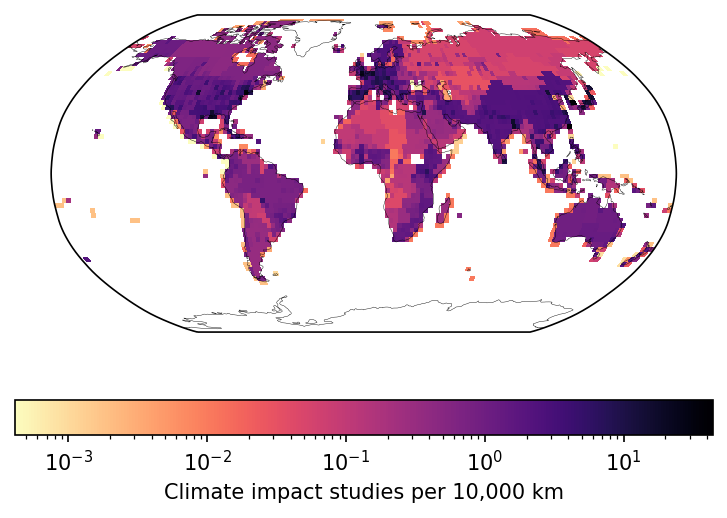

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import numpy as np
from matplotlib import colormaps

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.coastlines(lw=0.2)

study_grid_df["land_studies"] = study_grid_df["all_studies"]
study_grid_df.loc[study_grid_df["is_land"]!=True, "land_studies"] = np.NaN

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

n = np.array(study_grid_df.land_studies).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=colormaps['magma_r'],
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree(),
)





cbar = plt.colorbar(mesh, orientation="horizontal")
cbar.set_label("Climate impact studies per 10,000 km")


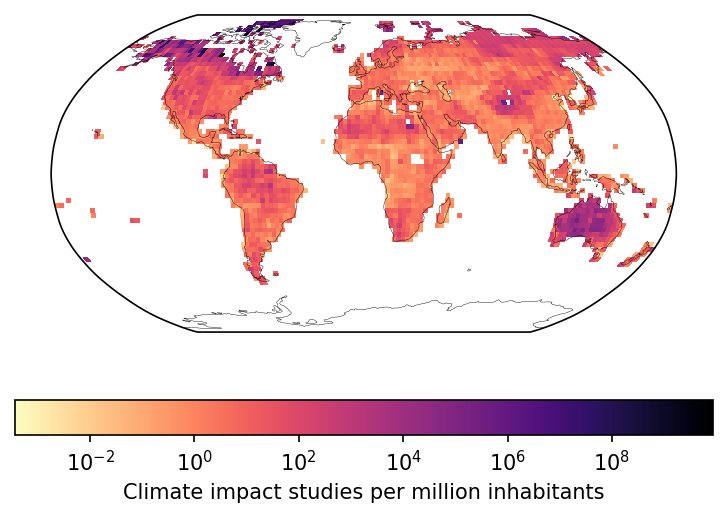

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import numpy as np
from matplotlib import colormaps

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.coastlines(lw=0.2)

study_grid_df["land_studies"] = study_grid_df["all_studies_pp"]
study_grid_df.loc[study_grid_df["is_land"]!=True, "land_studies"] = np.NaN

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

n = np.array(study_grid_df.land_studies).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=colormaps['magma_r'],
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree(),
)



cbar = plt.colorbar(mesh, orientation="horizontal")
cbar.set_label("Climate impact studies per million inhabitants")


In [10]:
for orig_var in ["temp_da", "precip_da"]:
    simp_var = f"{orig_var}_simplified"
    grid_df[simp_var] = grid_df[orig_var]
    grid_df.loc[grid_df[orig_var].isin([2,3]), simp_var] = 1
    grid_df.loc[grid_df[orig_var].isin([-2,-3]), simp_var] = -1
    grid_df.loc[grid_df[orig_var].isin([-4, 4]), simp_var] = 0
grid_df.head()

,index,LAT,LON,area,is_land,precip_da,temp_da,population,temp_da_simplified,precip_da_simplified
0,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN
1,1,-88.75,-176.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN
2,2,-88.75,-173.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN
3,3,-88.75,-171.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN
4,4,-88.75,-168.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN


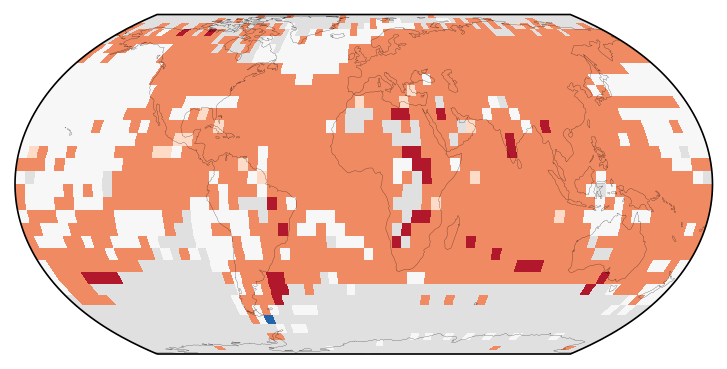

In [11]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

def plot_da(df, ax, da_var, colors=['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"], vmin=-4, vmax=4):
    
    ax.coastlines(lw=0.1)

    bn = np.zeros((len(df.LAT.unique()), len(df.LON.unique())))
    bn+=1
    mesh = ax.pcolormesh(
        df.LON.unique(),#-degrees*0.5,
        df.LAT.unique(),#-degrees*0.5,
        bn,
        cmap = mpl.colors.ListedColormap(["#e0e0e0"]),
        transform=ccrs.PlateCarree(),
    )
    
    n = np.array(df[da_var]).reshape(len(df.LAT.unique()),len(df.LON.unique()))
    mesh = ax.pcolormesh(
        df.LON.unique(),
        df.LAT.unique(),
        n,
        cmap=mpl.colors.ListedColormap(colors),
        vmin=vmin, vmax=vmax,
        transform=ccrs.PlateCarree(),
    )
    
    return mesh

precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
    
plot_da(grid_df, ax, 'temp_da', precip_colors[::-1])

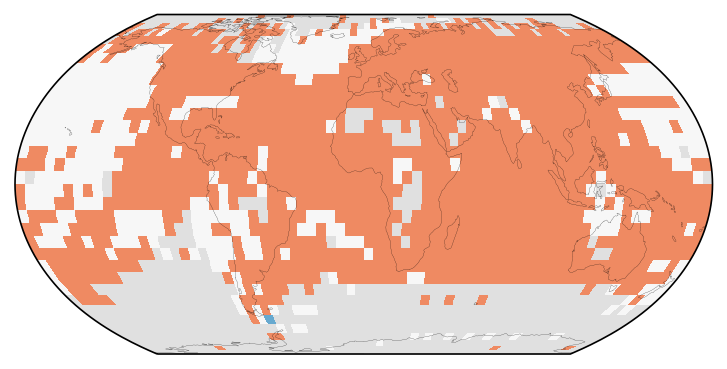

In [12]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

s_precip_colors = ['#ef8a62','#f7f7f7','#67a9cf']
plot_da(grid_df, ax, 'temp_da_simplified', s_precip_colors[::-1], -1, 1)

(0.0, 1.0)


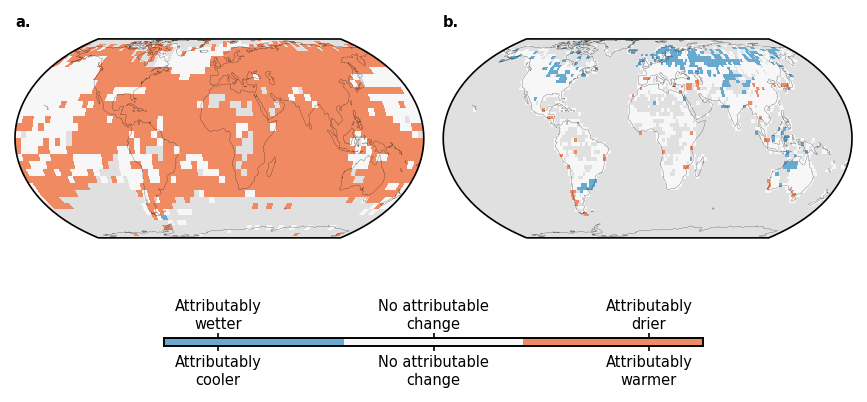

In [13]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,3), dpi=150, constrained_layout=False)
w_r = [1,2,2,1]

h_r = [1.25,0.1]
gs = fig.add_gridspec(2, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'temp_da_simplified', s_precip_colors[::-1], -1, 1)

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(grid_df, axb, 'precip_da_simplified', s_precip_colors, -1, 1)

## Cbar
cax = plt.subplot(gs[1,1:3])

def s_double_cbar(mesh, cax, frac):
    cax.axis('off')

    cax = cax.inset_axes([0.0,(1-frac)*0.5,1,frac])

    #cax.axis('off')
    cax2 = cax.twiny()
    cbar = plt.colorbar(
        mesh, orientation="horizontal", cax=cax, 
        ticks=np.linspace(-.8,.8,3),
    )
    cax.set_xticklabels(["Attributably\ncooler", "No attributable\nchange", "Attributably\nwarmer"])


    
    
    cax2.set_xlim(-1,1)
    cax2.set_xticks(np.linspace(-.8,.8,3))
    cax2.set_xticklabels(["Attributably\nwetter", "No attributable\nchange", "Attributably\ndrier"], fontsize=7)
    cax2.xaxis.set_tick_params(pad=1,length=2.5)
    cax.xaxis.set_tick_params(pad=1.5,length=2.5)
#     cax2.set_xlabel('D&A category - precipitation (wetter/drier)', fontsize=7,labelpad=3)
#     cbar.set_label('D&A category - temperature (colder/warmer)', fontsize=7, labelpad=2)

    cbar.ax.tick_params(labelsize=7)

    print(cax.get_ylim())
    
s_double_cbar(mesh, cax, 0.4)

/tmp/ipykernel_375702/363570449.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('magma_r'),


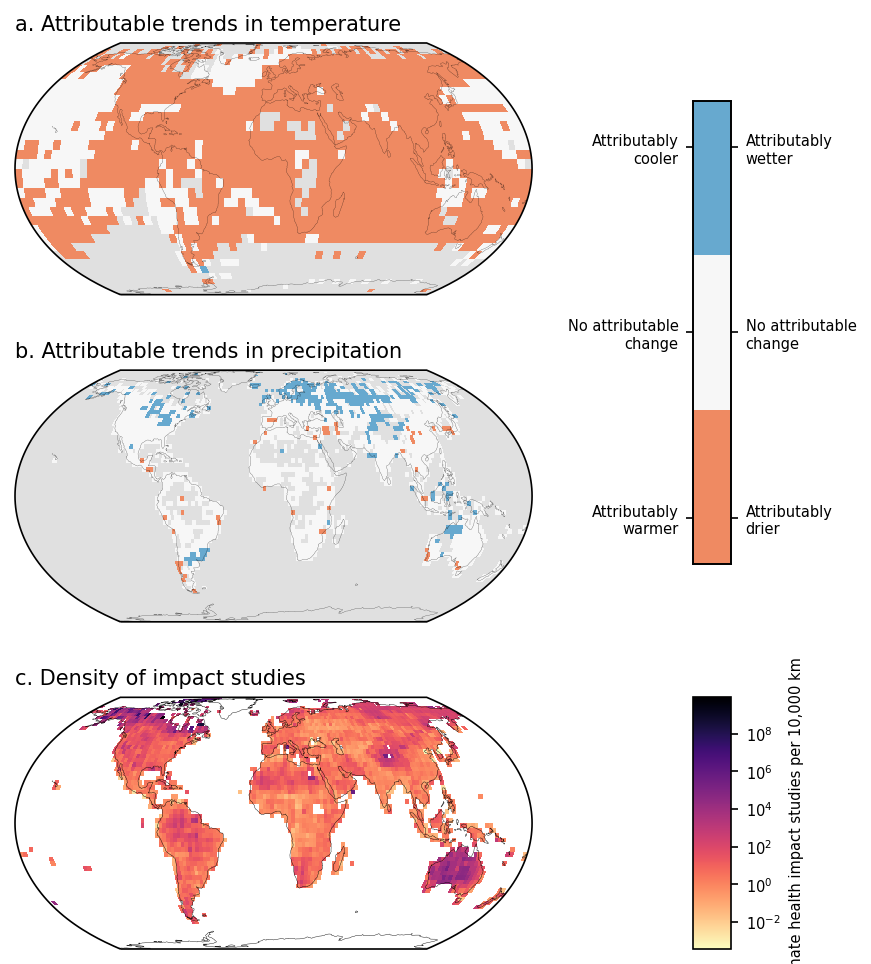

In [14]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 10

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,8), dpi=150, constrained_layout=False)
w_r = [1,.05]

h_r = [1,1,1]
gs = fig.add_gridspec(3, 2, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.3)

############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0], projection=ccrs.EqualEarth())
axa.set_title('a. Attributable trends in temperature', fontsize=title_fs, loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'temp_da_simplified', s_precip_colors[::-1], -1, 1)

############################################################
## Plot Precip

axa = plt.subplot(gs[1,0], projection=ccrs.EqualEarth())
axa.set_title('b. Attributable trends in precipitation', fontsize=title_fs, loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'precip_da_simplified', s_precip_colors, -1, 1)

frac = 0.8
cax = plt.subplot(gs[:2, 1])
cax.axis('off')

cax = cax.inset_axes([0.0,(1-frac)*0.5,1,frac])

#cax.axis('off')

cbar = plt.colorbar(
    mesh, cax=cax, 
    ticks=np.linspace(-.8,.8,3),
)
cax.set_yticklabels(["Attributably\nwarmer", "No attributable\nchange", "Attributably\ncooler"], fontsize=7)

cax2 = cax.twinx()


cax2.set_ylim(-1,1)
cax2.set_yticks(np.linspace(-.8,.8,3))
cax2.set_yticklabels(["Attributably\ndrier", "No attributable\nchange", "Attributably\nwetter"], fontsize=7)
# cax2.xaxis.set_tick_params(pad=1,length=2.5)
# cax.xaxis.set_tick_params(pad=1.5,length=2.5)
# #     cax2.set_xlabel('D&A category - precipitation (wetter/drier)', fontsize=7,labelpad=3)
# #     cbar.set_label('D&A category - temperature (colder/warmer)', fontsize=7, labelpad=2)

# cbar.ax.tick_params(labelsize=7)


## Plot study density

ax = plt.subplot(gs[2,0],projection=ccrs.EqualEarth())
ax.set_title('c. Density of impact studies', fontsize=title_fs, loc="left" )
ax.coastlines(lw=0.2)

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

n = np.array(study_grid_df.land_studies).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=plt.cm.get_cmap('magma_r'),
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree(),
)

cax = plt.subplot(gs[2,1])

cbar = plt.colorbar(mesh, orientation="vertical", cax=cax)
cax.tick_params(labelsize=7)
cbar.set_label("Climate health impact studies per 10,000 km", fontsize=7)



In [ ]:
xdf = pd.DataFrame(

In [21]:
study_grid_df.loc[
    (study_grid_df['precip_da'].isin([2,3])) &
    (study_grid_df['temp_da'].isin([2,3])),
    "study_addition"
] = "add" 

study_grid_df.loc[
    (~study_grid_df['precip_da'].isin([2,3])) &
    (~study_grid_df['temp_da'].isin([2,3])),
    "study_addition"
] = "add" 

study_grid_df.loc[
    (study_grid_df['precip_da'].isin([2,3])) &
    (~study_grid_df['temp_da'].isin([2,3])),
    "study_addition" 
] = "precip" 

study_grid_df.loc[
    (~study_grid_df['precip_da'].isin([2,3])) &
    (study_grid_df['temp_da'].isin([2,3])),
    "study_addition"  
] = "temp"

study_grid_df.loc[study_grid_df['study_addition']=="temp","da_studies"] = study_grid_df.loc[study_grid_df['study_addition']=="temp","temp_studies"]
study_grid_df.loc[study_grid_df['study_addition']=="precip","da_studies"] = study_grid_df.loc[study_grid_df['study_addition']=="precip","precip_studies"]
study_grid_df.loc[study_grid_df['study_addition']=="add","da_studies"] = study_grid_df.loc[study_grid_df['study_addition']=="add",["precip_studies","temp_studies"]].sum(axis=1)
study_grid_df.head()

,index,LAT,LON,ISO_A3,country,CVF_MEMBER,INCOME_GRP,area,is_land,precip_da,...,"Rivers, lakes, and soil moisture_studies","Rivers, lakes, and soil moisture_studies_count",Terrestrial ES_studies,Terrestrial ES_studies_count,Physical systems_studies,Physical systems_studies_count,land_studies,n_da_impacts,study_addition,da_studies
0,0,-88.75,-178.75,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.0
1,1,-88.75,-176.25,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.0
2,2,-88.75,-173.75,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.0
3,3,-88.75,-171.25,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.0
4,4,-88.75,-168.75,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.0


In [ ]:
import numpy as np
plt.hist(study_grid_df[study_grid_df['is_land']==True].all_studies,bins=50)
plt.show()

median 3.094352739368308
mean 6.793525028038078
q2 0.9650066539355101


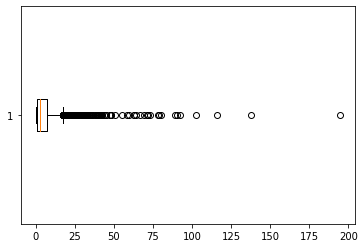

In [23]:
fig, ax = plt.subplots()
ax.boxplot(study_grid_df[study_grid_df['is_land']==True].all_studies.fillna(0), vert=False)
#ax.set_xlim(xmax=50, xmin=-1)
print("median", study_grid_df[study_grid_df['is_land']==True].all_studies.median())
print("mean", study_grid_df[study_grid_df['is_land']==True].all_studies.mean())
print("q2", study_grid_df[study_grid_df['is_land']==True].all_studies.quantile(.25))

In [24]:
lots = 5
little = 1


#lots = 5
#little =1

def cat_evidence(df, lots, little, s_var):

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df[s_var]<little),"evidence_cat"
    ] = 1

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df[s_var]>=little),"evidence_cat"
    ] = 2

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df[s_var]>=lots),"evidence_cat"
    ] = 3

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df[s_var]<little),"evidence_cat"
    ] = 4

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df[s_var]>=little),"evidence_cat"
    ] = 5

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df[s_var]>=lots),"evidence_cat"
    ] = 6
    
    return df

study_grid_df = cat_evidence(study_grid_df, lots, little, "all_studies")
study_grid_df

,index,LAT,LON,ISO_A3,country,CVF_MEMBER,INCOME_GRP,area,is_land,precip_da,...,"Rivers, lakes, and soil moisture_studies_count",Terrestrial ES_studies,Terrestrial ES_studies_count,Physical systems_studies,Physical systems_studies_count,land_studies,n_da_impacts,study_addition,da_studies,evidence_cat
0,0,-88.75,-178.75,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.000000,NaN
1,1,-88.75,-176.25,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.000000,NaN
2,2,-88.75,-173.75,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.000000,NaN
3,3,-88.75,-171.25,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.000000,NaN
4,4,-88.75,-168.75,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,add,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,10363,88.75,168.75,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,29.0,0.034928,22.0,0.245626,169.0,NaN,0,add,0.331543,4.0
10364,10364,88.75,171.25,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,29.0,0.034928,22.0,0.245626,169.0,NaN,0,add,0.331543,4.0
10365,10365,88.75,173.75,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,29.0,0.034928,22.0,0.245626,169.0,NaN,0,add,0.331543,4.0
10366,10366,88.75,176.25,NaN,NaN,NaN,NaN,1685.654015,False,NaN,...,29.0,0.034928,22.0,0.245626,169.0,NaN,0,add,0.331543,4.0


In [25]:
greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
rdpu = ['#feebe2','#fbb4b9','#f768a1','#ae017e'][1:]
impact_cols = rdpu
colors = impact_cols + greys 
hatch_types = ["","","/////"]

In [26]:
all_land = study_grid_df[study_grid_df["is_land"]==True]
impacted_land = all_land[all_land["n_da_impacts"]>0]
impacted_land.population.sum() / all_land.population.sum()

0.8506318994457588

In [27]:
all_cvf = study_grid_df[study_grid_df["CVF_MEMBER"]==1]
impacted_cvf = all_cvf[all_cvf["n_da_impacts"]>0]
impacted_cvf.population.sum() / all_cvf.population.sum()

0.7601994039232949

In [28]:
nada_cvf = all_cvf[(pd.isna(all_cvf["temp_da"])) | (pd.isna(all_cvf["precip_da"]))]
nada_cvf.population.sum() / all_cvf.population.sum()

0.18026575743806506

In [29]:
shp_df_matches


,grid_df_id,doc_id,shp_id,place,index,area,doc_share,doc_share_km10000
0,6281,5244143.0,1710.0,'asir region,6281,73170.065846,0.035873,0.004903
1,6281,3927578.0,1710.0,'asir region,6281,73170.065846,0.035873,0.004903
2,6281,899301.0,1710.0,'asir region,6281,73170.065846,0.035873,0.004903
3,6281,4234875.0,1710.0,'asir region,6281,73170.065846,0.035873,0.004903
4,6281,1025462.0,1710.0,'asir region,6281,73170.065846,0.032507,0.004443
...,...,...,...,...,...,...,...,...
14981705,906,3335717.0,NaN,triassic nunatak,906,21622.616859,0.086964,0.040219
14981706,9842,2307829.0,NaN,daniel bruun firn,9842,11754.698512,0.274160,0.233235
14981707,9219,3703223.0,NaN,herald reef,9219,24837.890473,0.010345,0.004165
14981708,9219,1301531.0,NaN,herald reef,9219,24837.890473,0.001687,0.000679


In [30]:
cvf_studies = shp_df_matches[
    shp_df_matches["grid_df_id"].isin(all_cvf["index"])
].doc_id.nunique()
print(cvf_studies, "studies in CVF countries")
print(cvf_studies / (all_cvf.population.sum()/1e6))

16740 studies in CVF countries
13.390603308772816


In [31]:
cvf_dids = shp_df_matches[
    shp_df_matches["grid_df_id"].isin(all_cvf["index"])
].doc_id.unique()
cvf_docs = df[df["id"].isin(cvf_dids)]
impact_cols = [x for x in cvf_docs.columns if "12 - " in x and "mean" in x]
for ic in impact_cols:
    idocs = cvf_docs[cvf_docs[ic]>=0.5].shape[0]
    print(ic)
    print(idocs/cvf_docs.shape[0])

12 - Coastal and marine Ecosystems - prediction_mean
0.0701919205475775
12 - Human and managed - prediction_mean
0.24352435914642329
12 - Mountains, snow and ice - prediction_mean
0.13837068849818815
12 - Rivers, lakes, and soil moisture - prediction_mean
0.14387330559656422
12 - Terrestrial ES - prediction_mean
0.1502482888202926
12 - Physical systems - prediction_mean
0.09394712119178633


In [32]:
all_land_studies = shp_df_matches[
    shp_df_matches["grid_df_id"].isin(all_land["index"])
].doc_id.nunique()

print(all_land_studies, "all land studies")
print(all_land_studies / (all_land.population.sum()/1e6))

136685 all land studies
20.9472677731579


In [33]:
hio = study_grid_df[study_grid_df["INCOME_GRP"]=="1. High income: OECD"]

hio_dids = shp_df_matches[
    shp_df_matches["grid_df_id"].isin(hio["index"])
].doc_id.unique()

hio_studies = shp_df_matches[
    shp_df_matches["grid_df_id"].isin(hio["index"])
].doc_id.nunique()
print(hio_studies, "all land studies")
print(hio_studies / (hio.population.sum()/1e6))

72893 all land studies
84.13453309284674


In [34]:
hio_docs = df[df["id"].isin(hio_dids)]
impact_cols = [x for x in cvf_docs.columns if "12 - " in x and "mean" in x]
for ic in impact_cols:
    idocs = hio_docs[hio_docs[ic]>=0.5].shape[0]
    print(ic)
    print(idocs/hio_docs.shape[0])

12 - Coastal and marine Ecosystems - prediction_mean
0.12403075197149173
12 - Human and managed - prediction_mean
0.10484376546672386
12 - Mountains, snow and ice - prediction_mean
0.07909063912627445
12 - Rivers, lakes, and soil moisture - prediction_mean
0.13237865839575017
12 - Terrestrial ES - prediction_mean
0.2764707823275151
12 - Physical systems - prediction_mean
0.09560497574817699


[]

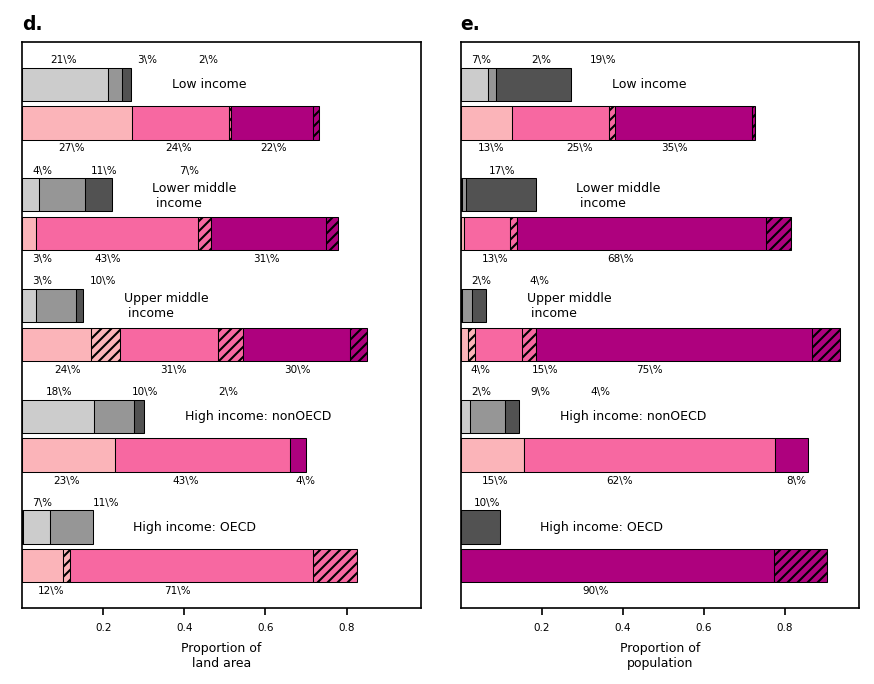

In [35]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7.2,5), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7,1,1]

h_r = [1.25,0.1,2.6,0.1]

gs = fig.add_gridspec(1, 2, figure=fig, wspace=0.1, hspace=0.5)

###########################################################
##

labels = ["Proportion of\nland area","Proportion of\npopulation"]
texts = []
fs=8
title_fs=9

axs = [plt.subplot(gs[:,0])]

axs.append(plt.subplot(gs[:,1],sharex=axs[0]))

offsets = [0.15,-0.15]

for k in [0,1]:
    income_x = 0
    ax = axs[k]
    ax.set_title(f'{chr(k+100)}.', fontsize=title_fs, fontweight="bold", loc="left" )
    ax.set_xlabel(labels[k], fontsize=6)

    handles = [[],[]]
    
    for inc, cells in study_grid_df.groupby('INCOME_GRP'):
        #cells = df[df['index'].isin(group['study_grid_df_id'])]

        area_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
        area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

        pop_sums = cells.groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
        pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
        
        sums = [area_sums, pop_sums][k]

        bottoms = {0: 0.0, 1: 0.0}
        


        with mpl.rc_context(rc={'hatch.linewidth': 2}):
            
            ys = []
            text_labels = []
            min_text_left = 0.025

            for i, (name, group) in enumerate(sums.groupby('evidence_cat')):
                x = name//4 
                if bottoms[x]==0:
                    ys = []
                y = bottoms[x]+group['prop'].sum()*0.33
                if group['prop'].sum()>0.02:
                    ys.append(max(y,min_text_left))
                    if len(ys)>1:
                        min_distance = ys[-1] - ys[-2]
                        
                        while min_distance < 0.07*len(text_labels[-1]):
                            y+=0.01
                            ys[-1] = y
                            min_distance = ys[-1] - ys[-2]
                    texts.append(ax.text(
                        max(y,min_text_left),x + income_x + offsets[int(x)]*-2, 
                        f"{group['prop'].sum():.0%}".replace("%","\%"),
                        ha="left",va="center", fontsize=5
                    ))
                    text_labels.append(f"{group['prop'].sum():.0%}")
                for j, group in group.groupby('n_da_impacts'):
                    y = group['prop'].values[0]
                    b = ax.barh(
                        x + income_x + offsets[int(x)],y, left=bottoms[x], 
                        color=colors[i], hatch=hatch_types[j],
                        edgecolor="black",
                        linewidth=0.5,
                        height=0.6
                    )
                    bottoms[x]+=y
                    if "Upper" in inc:
                        #print(int(x))
                        #print(colors[i])
                        handles[int(x)] = handles[int(x)] + [b]
                        #print([bp.patches[0].get_fc() for bp in handles[0]])
                
        ax.text(bottoms[x]+0.1, x + income_x + offsets[int(x)],inc[3:].replace('middle',"middle\n"),ha="left", va="center", fontsize=6)
        income_x+=2
        
    ax.tick_params(axis='x', labelsize=5)
        
axs[1].set_yticks([])
        
axs[0].set_yticks([])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import numpy as np

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.coastlines(lw=0.2)

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

n = np.array(study_grid_df.n).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=plt.cm.get_cmap('magma'),
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree(),
)

cbar = plt.colorbar(mesh)